## In order to draw the graphs after doing the mesaurments on your device , you need to run the files in the same order. I mean run file 1,2,3,4,5,.. in order, then run the following file so that the figures can be updated accordingly.

In [1]:
import os
os.listdir('.')

['.ipynb_checkpoints',
 '1.EW-short_Weierestress_Final_Real_world_example-implemnted-DEMO-Copy1 (1).ipynb',
 '2.EM_Affine_Coordinates_Real_world_examples_DEMO.ipynb',
 '3.EM_Projected_coordinates_Real_world_examples_without_strategies.ipynb',
 '4.EM_Projected_coordinates_optimized_Final_Real_world_with_strategies .ipynb',
 'cpu_measurement.txt',
 'cpu_measurement_combined_multiple.txt',
 'Drawing Figures.ipynb',
 'FP2.ipynb',
 'iteration.sobj',
 'Naive_implementation_using_sage_math_DEMO for understanding purposes only.ipynb',
 'time_measurement.txt',
 'time_measurement_combined_multiple.txt']

In [2]:
import numpy as np

In [3]:
iteration = load('iteration.sobj')

# Reading the time measurments seperately for Alice and Bob as (public key , shared key)

In [4]:
figures = [ 'E_W_Affine(avg)', 'E_M_Affine(avg)', 'E_M_Projected_no_strategies(avg)','E_M_Projected_with_strategies(avg)']
lines =  ['Alice_pk','Bob_pk', 'Alice_sk', 'Bob_sk']

In [5]:
file=open('time_measurement.txt','r')

for graph_type in figures:
    for index in range(0,iteration,1):  
        for graph_line in lines:
        
            s = file.readline()
            l = eval(s)
            l = [n*1000 for n in l]
           # print(l)
            locals()[graph_type+'_'+graph_line+str(index)]=l
            if(index == 0):
                locals()[graph_type+'_'+graph_line+'_'+'multiple'] = np.array([locals()[graph_type+'_'+graph_line+str(index)]])
            else:
                row = np.array(l)
                locals()[graph_type+'_'+graph_line+'_'+'multiple'] = np.r_[locals()[graph_type+'_'+graph_line+'_'+'multiple'],[row]]
            
file.close()


# Average computations

In [6]:
for graph_type in figures:
    for graph_line in lines:
        locals()[graph_type+'_'+graph_line]= (sum(locals()[graph_type+'_'+graph_line+'_'+'multiple'],0)/iteration).tolist()

#  Reading the time measurments combined  for Alice and Bob

In [7]:
figures = [ 'E_W_Affine(avg)', 'E_M_Affine(avg)', 'E_M_Projected_no_strategies(avg)','E_M_Projected_with_strategies(avg)']
lines =  ['Alice_(pk+shared_key)', 'Bob_(pk+shared_key)']

In [8]:
file=open('time_measurement_combined_multiple.txt','r')
for graph_type in figures:
    for index in range(0,iteration,1):  
        for graph_line in lines:
        
            s = file.readline()
            l = eval(s)
            l = [n*1000 for n in l]
           # print(l)
            locals()[graph_type+'_'+graph_line+str(index)]=l
            if(index == 0):
                locals()[graph_type+'_'+graph_line+'_'+'multiple'] = np.array([locals()[graph_type+'_'+graph_line+str(index)]])
            else:
                row = np.array(l)
                locals()[graph_type+'_'+graph_line+'_'+'multiple'] = np.r_[locals()[graph_type+'_'+graph_line+'_'+'multiple'],[row]]
            
file.close()


# Average computations

In [9]:
for graph_type in figures:
    for graph_line in lines:
        locals()[graph_type+'_'+graph_line]= (sum(locals()[graph_type+'_'+graph_line+'_'+'multiple'],0)/iteration).tolist()

# Drawing time mesaurments figures

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown as md

In [11]:
figures = [ 'E_M_Affine(avg)', 'E_W_Affine(avg)', 'E_M_Projected_no_strategies(avg)','E_M_Projected_with_strategies(avg)']

# Alice's PK

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


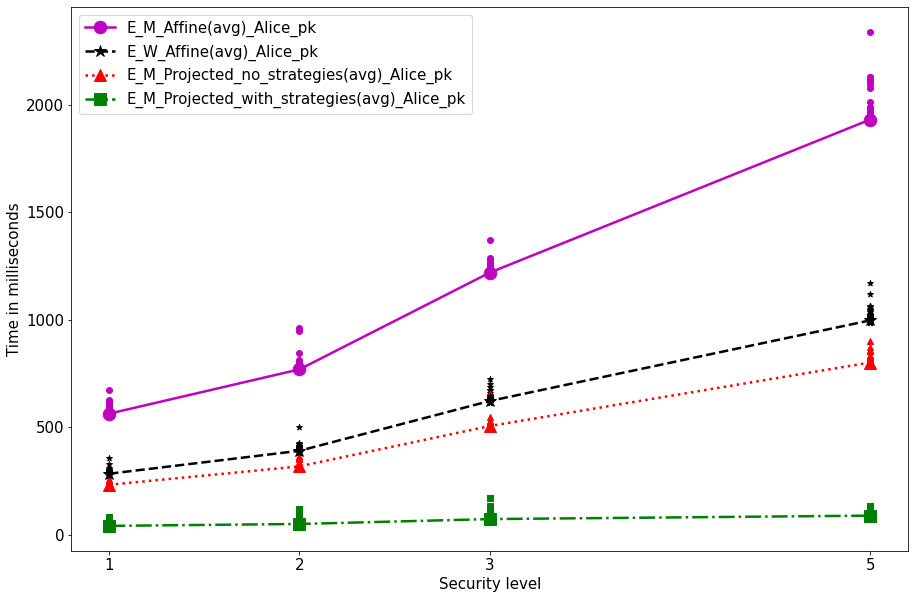

In [12]:
graph_line = 'Alice_pk'
y_axis_label = 'Time in milliseconds'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [13]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],format(locals()[figures[0]+'_'+graph_line][0],'.3f'),format(locals()[figures[0]+'_'+graph_line][1],'.3f'),format(locals()[figures[0]+'_'+graph_line][2],'.3f'),format(locals()[figures[0]+'_'+graph_line][3],'.3f'),figures[1],format(locals()[figures[1]+'_'+graph_line][0],'.3f'),format(locals()[figures[1]+'_'+graph_line][1],'.3f'),format(locals()[figures[1]+'_'+graph_line][2],'.3f'),format(locals()[figures[1]+'_'+graph_line][3],'.3f'),figures[2],format(locals()[figures[2]+'_'+graph_line][0],'.3f'),format(locals()[figures[2]+'_'+graph_line][1],'.3f'),format(locals()[figures[2]+'_'+graph_line][2],'.3f'),format(locals()[figures[2]+'_'+graph_line][3],'.3f'),figures[3],format(locals()[figures[3]+'_'+graph_line][0],'.3f'),format(locals()[figures[3]+'_'+graph_line][1],'.3f'),format(locals()[figures[3]+'_'+graph_line][2],'.3f'),format(locals()[figures[3]+'_'+graph_line][3],'.3f')))

## Time in milliseconds needed to generate Alice_pk over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>562.623</td><td style='text-align:center'>768.640</td><td style='text-align:center'>1218.578</td><td style='text-align:center'>1930.511</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>283.268</td><td style='text-align:center'>389.918</td><td style='text-align:center'>621.531</td><td style='text-align:center'>996.562</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>231.800</td><td style='text-align:center'>317.432</td><td style='text-align:center'>505.047</td><td style='text-align:center'>800.554</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>40.584</td><td style='text-align:center'>49.506</td><td style='text-align:center'>72.224</td><td style='text-align:center'>88.279</td></tr></table>

# Alice's Shared Key

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


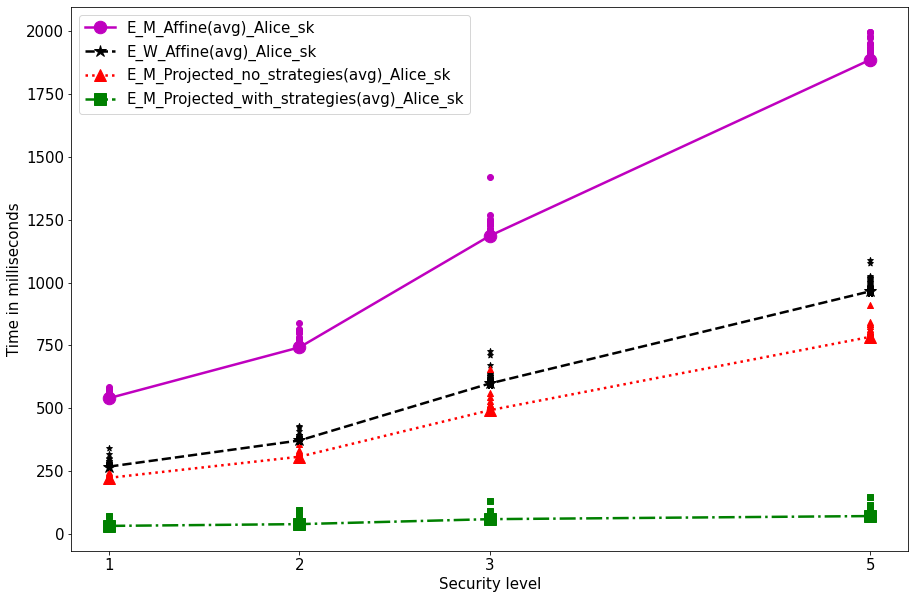

In [14]:
graph_line = 'Alice_sk'
y_axis_label = 'Time in milliseconds'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [15]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],format(locals()[figures[0]+'_'+graph_line][0],'.3f'),format(locals()[figures[0]+'_'+graph_line][1],'.3f'),format(locals()[figures[0]+'_'+graph_line][2],'.3f'),format(locals()[figures[0]+'_'+graph_line][3],'.3f'),figures[1],format(locals()[figures[1]+'_'+graph_line][0],'.3f'),format(locals()[figures[1]+'_'+graph_line][1],'.3f'),format(locals()[figures[1]+'_'+graph_line][2],'.3f'),format(locals()[figures[1]+'_'+graph_line][3],'.3f'),figures[2],format(locals()[figures[2]+'_'+graph_line][0],'.3f'),format(locals()[figures[2]+'_'+graph_line][1],'.3f'),format(locals()[figures[2]+'_'+graph_line][2],'.3f'),format(locals()[figures[2]+'_'+graph_line][3],'.3f'),figures[3],format(locals()[figures[3]+'_'+graph_line][0],'.3f'),format(locals()[figures[3]+'_'+graph_line][1],'.3f'),format(locals()[figures[3]+'_'+graph_line][2],'.3f'),format(locals()[figures[3]+'_'+graph_line][3],'.3f')))

## Time in milliseconds needed to generate Alice_sk over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>540.459</td><td style='text-align:center'>742.293</td><td style='text-align:center'>1185.393</td><td style='text-align:center'>1885.649</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>268.170</td><td style='text-align:center'>371.997</td><td style='text-align:center'>598.519</td><td style='text-align:center'>965.025</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>223.503</td><td style='text-align:center'>307.439</td><td style='text-align:center'>492.218</td><td style='text-align:center'>783.840</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>32.338</td><td style='text-align:center'>39.368</td><td style='text-align:center'>59.123</td><td style='text-align:center'>71.422</td></tr></table>

#  Alice's public key + shared key

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


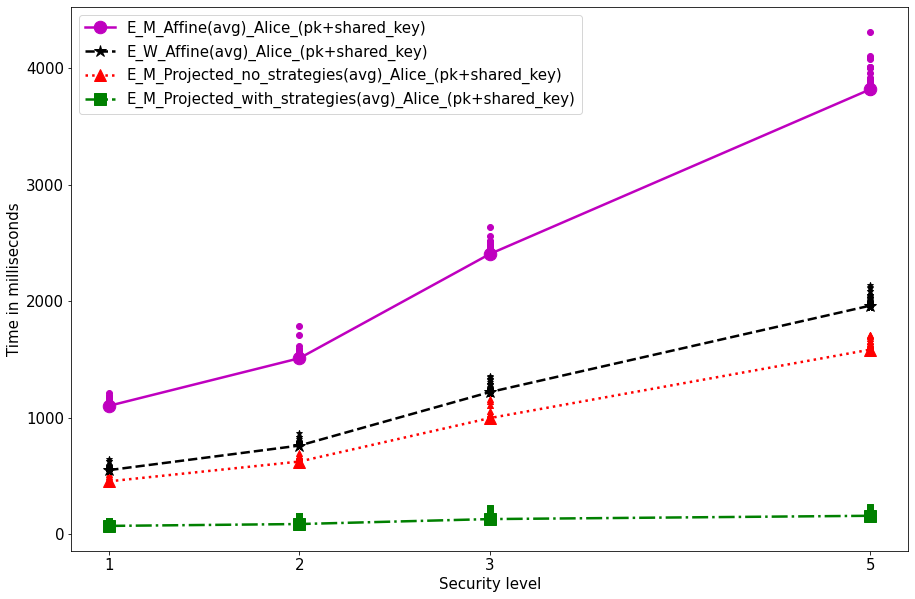

In [16]:
graph_line = 'Alice_(pk+shared_key)'
y_axis_label = 'Time in milliseconds'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [17]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],format(locals()[figures[0]+'_'+graph_line][0],'.3f'),format(locals()[figures[0]+'_'+graph_line][1],'.3f'),format(locals()[figures[0]+'_'+graph_line][2],'.3f'),format(locals()[figures[0]+'_'+graph_line][3],'.3f'),figures[1],format(locals()[figures[1]+'_'+graph_line][0],'.3f'),format(locals()[figures[1]+'_'+graph_line][1],'.3f'),format(locals()[figures[1]+'_'+graph_line][2],'.3f'),format(locals()[figures[1]+'_'+graph_line][3],'.3f'),figures[2],format(locals()[figures[2]+'_'+graph_line][0],'.3f'),format(locals()[figures[2]+'_'+graph_line][1],'.3f'),format(locals()[figures[2]+'_'+graph_line][2],'.3f'),format(locals()[figures[2]+'_'+graph_line][3],'.3f'),figures[3],format(locals()[figures[3]+'_'+graph_line][0],'.3f'),format(locals()[figures[3]+'_'+graph_line][1],'.3f'),format(locals()[figures[3]+'_'+graph_line][2],'.3f'),format(locals()[figures[3]+'_'+graph_line][3],'.3f')))

## Time in milliseconds needed to generate Alice_(pk+shared_key) over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>1103.082</td><td style='text-align:center'>1510.933</td><td style='text-align:center'>2403.971</td><td style='text-align:center'>3816.159</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>551.438</td><td style='text-align:center'>761.915</td><td style='text-align:center'>1220.050</td><td style='text-align:center'>1961.587</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>455.303</td><td style='text-align:center'>624.871</td><td style='text-align:center'>997.265</td><td style='text-align:center'>1584.394</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>72.922</td><td style='text-align:center'>88.874</td><td style='text-align:center'>131.347</td><td style='text-align:center'>159.702</td></tr></table>

# Bob's PK

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


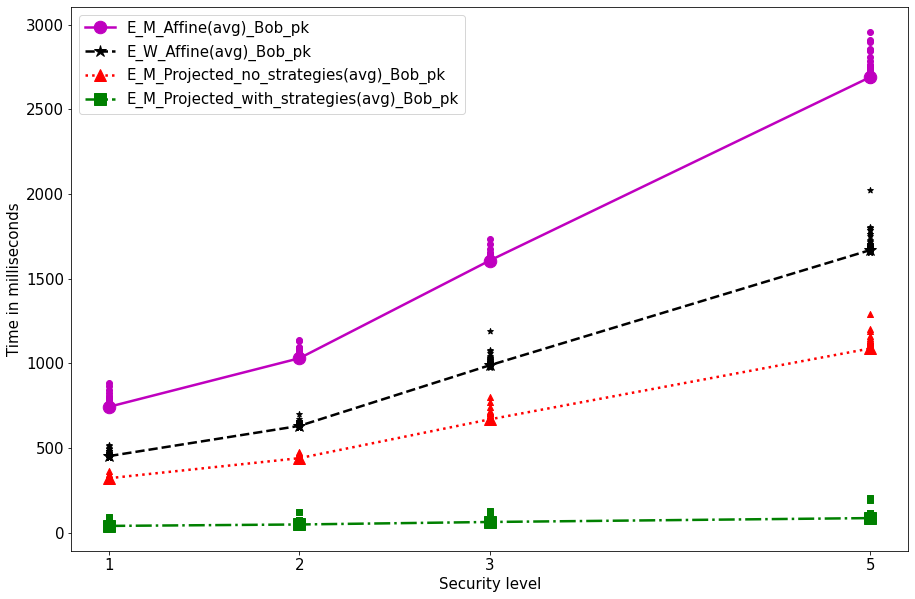

In [18]:
graph_line = 'Bob_pk'
y_axis_label = 'Time in milliseconds'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [19]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],format(locals()[figures[0]+'_'+graph_line][0],'.3f'),format(locals()[figures[0]+'_'+graph_line][1],'.3f'),format(locals()[figures[0]+'_'+graph_line][2],'.3f'),format(locals()[figures[0]+'_'+graph_line][3],'.3f'),figures[1],format(locals()[figures[1]+'_'+graph_line][0],'.3f'),format(locals()[figures[1]+'_'+graph_line][1],'.3f'),format(locals()[figures[1]+'_'+graph_line][2],'.3f'),format(locals()[figures[1]+'_'+graph_line][3],'.3f'),figures[2],format(locals()[figures[2]+'_'+graph_line][0],'.3f'),format(locals()[figures[2]+'_'+graph_line][1],'.3f'),format(locals()[figures[2]+'_'+graph_line][2],'.3f'),format(locals()[figures[2]+'_'+graph_line][3],'.3f'),figures[3],format(locals()[figures[3]+'_'+graph_line][0],'.3f'),format(locals()[figures[3]+'_'+graph_line][1],'.3f'),format(locals()[figures[3]+'_'+graph_line][2],'.3f'),format(locals()[figures[3]+'_'+graph_line][3],'.3f')))

## Time in milliseconds needed to generate Bob_pk over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>744.790</td><td style='text-align:center'>1031.087</td><td style='text-align:center'>1607.476</td><td style='text-align:center'>2689.886</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>453.778</td><td style='text-align:center'>631.903</td><td style='text-align:center'>989.403</td><td style='text-align:center'>1669.238</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>323.139</td><td style='text-align:center'>441.409</td><td style='text-align:center'>670.332</td><td style='text-align:center'>1088.549</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>41.502</td><td style='text-align:center'>49.978</td><td style='text-align:center'>64.657</td><td style='text-align:center'>87.659</td></tr></table>

# Bob's shared key

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


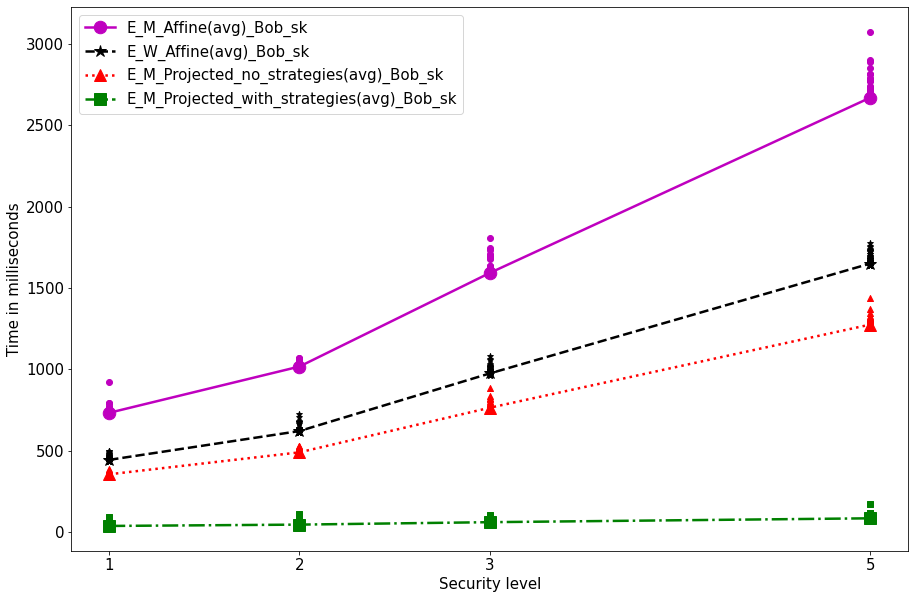

In [20]:
graph_line = 'Bob_sk'
y_axis_label = 'Time in milliseconds'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [21]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],format(locals()[figures[0]+'_'+graph_line][0],'.3f'),format(locals()[figures[0]+'_'+graph_line][1],'.3f'),format(locals()[figures[0]+'_'+graph_line][2],'.3f'),format(locals()[figures[0]+'_'+graph_line][3],'.3f'),figures[1],format(locals()[figures[1]+'_'+graph_line][0],'.3f'),format(locals()[figures[1]+'_'+graph_line][1],'.3f'),format(locals()[figures[1]+'_'+graph_line][2],'.3f'),format(locals()[figures[1]+'_'+graph_line][3],'.3f'),figures[2],format(locals()[figures[2]+'_'+graph_line][0],'.3f'),format(locals()[figures[2]+'_'+graph_line][1],'.3f'),format(locals()[figures[2]+'_'+graph_line][2],'.3f'),format(locals()[figures[2]+'_'+graph_line][3],'.3f'),figures[3],format(locals()[figures[3]+'_'+graph_line][0],'.3f'),format(locals()[figures[3]+'_'+graph_line][1],'.3f'),format(locals()[figures[3]+'_'+graph_line][2],'.3f'),format(locals()[figures[3]+'_'+graph_line][3],'.3f')))

## Time in milliseconds needed to generate Bob_sk over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>733.186</td><td style='text-align:center'>1017.340</td><td style='text-align:center'>1592.097</td><td style='text-align:center'>2669.006</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>444.058</td><td style='text-align:center'>621.112</td><td style='text-align:center'>974.861</td><td style='text-align:center'>1649.834</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>355.361</td><td style='text-align:center'>490.256</td><td style='text-align:center'>764.124</td><td style='text-align:center'>1275.061</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>37.969</td><td style='text-align:center'>46.162</td><td style='text-align:center'>61.116</td><td style='text-align:center'>84.915</td></tr></table>

# Bob's  PK+ shared key

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


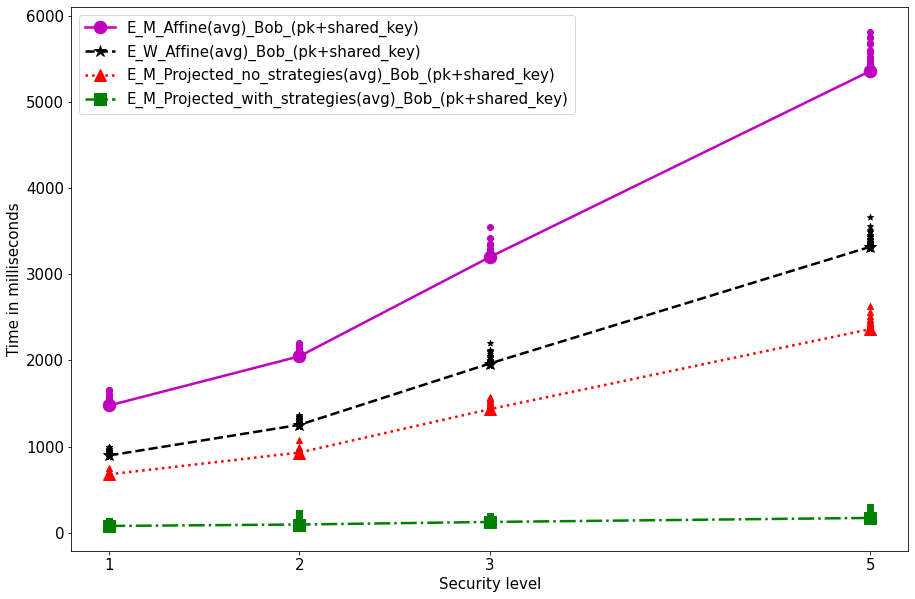

In [22]:
graph_line = 'Bob_(pk+shared_key)'
y_axis_label = 'Time in milliseconds'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [23]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],format(locals()[figures[0]+'_'+graph_line][0],'.3f'),format(locals()[figures[0]+'_'+graph_line][1],'.3f'),format(locals()[figures[0]+'_'+graph_line][2],'.3f'),format(locals()[figures[0]+'_'+graph_line][3],'.3f'),figures[1],format(locals()[figures[1]+'_'+graph_line][0],'.3f'),format(locals()[figures[1]+'_'+graph_line][1],'.3f'),format(locals()[figures[1]+'_'+graph_line][2],'.3f'),format(locals()[figures[1]+'_'+graph_line][3],'.3f'),figures[2],format(locals()[figures[2]+'_'+graph_line][0],'.3f'),format(locals()[figures[2]+'_'+graph_line][1],'.3f'),format(locals()[figures[2]+'_'+graph_line][2],'.3f'),format(locals()[figures[2]+'_'+graph_line][3],'.3f'),figures[3],format(locals()[figures[3]+'_'+graph_line][0],'.3f'),format(locals()[figures[3]+'_'+graph_line][1],'.3f'),format(locals()[figures[3]+'_'+graph_line][2],'.3f'),format(locals()[figures[3]+'_'+graph_line][3],'.3f')))

## Time in milliseconds needed to generate Bob_(pk+shared_key) over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>1477.975</td><td style='text-align:center'>2048.427</td><td style='text-align:center'>3199.574</td><td style='text-align:center'>5358.891</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>897.837</td><td style='text-align:center'>1253.014</td><td style='text-align:center'>1964.264</td><td style='text-align:center'>3319.072</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>678.500</td><td style='text-align:center'>931.665</td><td style='text-align:center'>1434.456</td><td style='text-align:center'>2363.610</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>79.471</td><td style='text-align:center'>96.140</td><td style='text-align:center'>125.774</td><td style='text-align:center'>172.574</td></tr></table>

  # CPU CYCLES MEASURMENTS

# Reading the time measurments seperately for Alice and Bob as (public key , shared key)

In [24]:
file=open('cpu_measurement.txt','r')
figures = [ 'E_W_Affine(avg)', 'E_M_Affine(avg)', 'E_M_Projected_no_strategies(avg)','E_M_Projected_with_strategies(avg)']
lines =  ['Alice_pk','Bob_pk', 'Alice_sk', 'Bob_sk']
for graph_type in figures:
    for index in range(0,iteration,1):  
        for graph_line in lines:
        
            s = file.readline()
            l = eval(s)
            l = [math.ceil (n/10**6) for n in l] 
            #print(l)
            locals()[graph_type+'_'+graph_line+str(index)]=l
            if(index == 0):
                locals()[graph_type+'_'+graph_line+'_'+'multiple'] = np.array([locals()[graph_type+'_'+graph_line+str(index)]])
            else:
                row = np.array(l)
                locals()[graph_type+'_'+graph_line+'_'+'multiple'] = np.r_[locals()[graph_type+'_'+graph_line+'_'+'multiple'],[row]]
            
file.close()

# Average Computations

In [25]:
for graph_type in figures:
    for graph_line in lines:
        locals()[graph_type+'_'+graph_line]= (sum(locals()[graph_type+'_'+graph_line+'_'+'multiple'],0)/iteration).tolist()
        locals()[graph_type+'_'+graph_line] = [int (n) for n in locals()[graph_type+'_'+graph_line]] 

#  Reading the time measurments combined  for Alice and Bob

In [26]:
file=open('cpu_measurement_combined_multiple.txt','r')
figures = [ 'E_W_Affine(avg)', 'E_M_Affine(avg)', 'E_M_Projected_no_strategies(avg)','E_M_Projected_with_strategies(avg)']
lines =  ['Alice_(pk+shared_key)', 'Bob_(pk+shared_key)']
for graph_type in figures:
    for index in range(0,iteration,1):  
        for graph_line in lines:
        
            s = file.readline()
            l = eval(s)
            l = [math.ceil (n/10**6) for n in l] 
            #print(l)
            locals()[graph_type+'_'+graph_line+str(index)]=l
            if(index == 0):
                locals()[graph_type+'_'+graph_line+'_'+'multiple'] = np.array([locals()[graph_type+'_'+graph_line+str(index)]])
            else:
                row = np.array(l)
                locals()[graph_type+'_'+graph_line+'_'+'multiple'] = np.r_[locals()[graph_type+'_'+graph_line+'_'+'multiple'],[row]]
            
file.close()

In [27]:
for graph_type in figures:
    for graph_line in lines:
        locals()[graph_type+'_'+graph_line]= (sum(locals()[graph_type+'_'+graph_line+'_'+'multiple'],0)/iteration).tolist()
        locals()[graph_type+'_'+graph_line] = [int (n) for n in locals()[graph_type+'_'+graph_line]] 

# Drawing CPU measurments figures

In [28]:
figures = [ 'E_M_Affine(avg)', 'E_W_Affine(avg)', 'E_M_Projected_no_strategies(avg)','E_M_Projected_with_strategies(avg)']

# Alice's PK

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


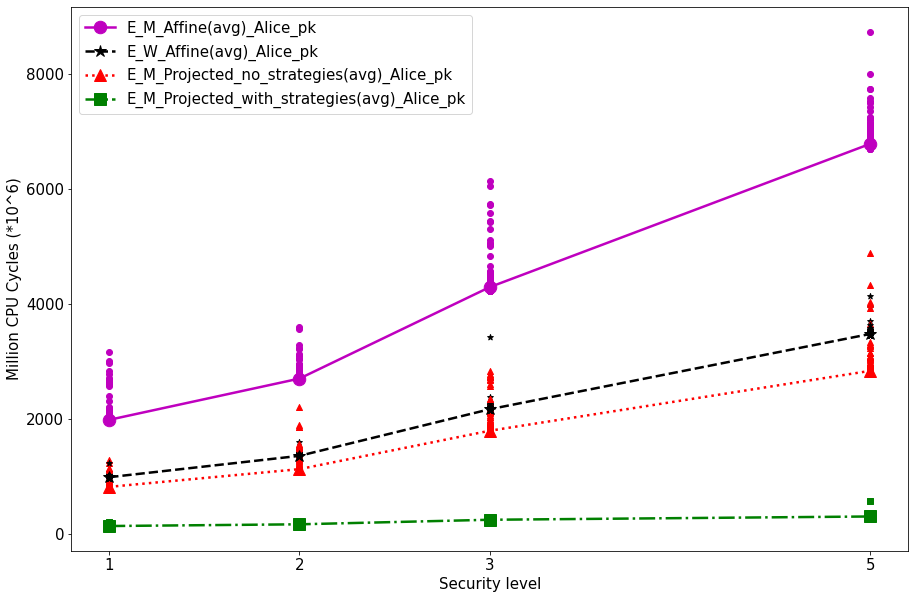

In [29]:
graph_line = 'Alice_pk'
y_axis_label = 'Million CPU Cycles (*10^6)'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [30]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],int(locals()[figures[0]+'_'+graph_line][0]),int(locals()[figures[0]+'_'+graph_line][1]),int(locals()[figures[0]+'_'+graph_line][2]),int(locals()[figures[0]+'_'+graph_line][3]),figures[1],int(locals()[figures[1]+'_'+graph_line][0]),int(locals()[figures[1]+'_'+graph_line][1]),int(locals()[figures[1]+'_'+graph_line][2]),int(locals()[figures[1]+'_'+graph_line][3]),figures[2],int(locals()[figures[2]+'_'+graph_line][0]),int(locals()[figures[2]+'_'+graph_line][1]),int(locals()[figures[2]+'_'+graph_line][2]),int(locals()[figures[2]+'_'+graph_line][3]),figures[3],int(locals()[figures[3]+'_'+graph_line][0]),(locals()[figures[3]+'_'+graph_line][1]),int(locals()[figures[3]+'_'+graph_line][2]),int(locals()[figures[3]+'_'+graph_line][3])))

## Million CPU Cycles (*10^6) needed to generate Alice_pk over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>1986</td><td style='text-align:center'>2703</td><td style='text-align:center'>4292</td><td style='text-align:center'>6782</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>989</td><td style='text-align:center'>1360</td><td style='text-align:center'>2170</td><td style='text-align:center'>3478</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>821</td><td style='text-align:center'>1129</td><td style='text-align:center'>1796</td><td style='text-align:center'>2837</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>140</td><td style='text-align:center'>170</td><td style='text-align:center'>249</td><td style='text-align:center'>306</td></tr></table>

# Alice's Shared key

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


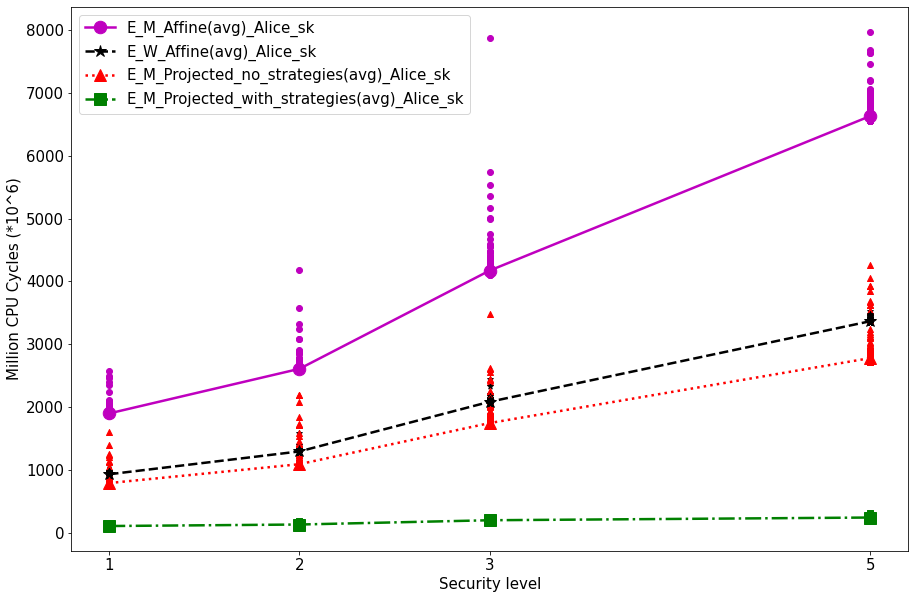

In [31]:
graph_line = 'Alice_sk'
y_axis_label = 'Million CPU Cycles (*10^6)'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [32]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],int(locals()[figures[0]+'_'+graph_line][0]),int(locals()[figures[0]+'_'+graph_line][1]),int(locals()[figures[0]+'_'+graph_line][2]),int(locals()[figures[0]+'_'+graph_line][3]),figures[1],int(locals()[figures[1]+'_'+graph_line][0]),int(locals()[figures[1]+'_'+graph_line][1]),int(locals()[figures[1]+'_'+graph_line][2]),int(locals()[figures[1]+'_'+graph_line][3]),figures[2],int(locals()[figures[2]+'_'+graph_line][0]),int(locals()[figures[2]+'_'+graph_line][1]),int(locals()[figures[2]+'_'+graph_line][2]),int(locals()[figures[2]+'_'+graph_line][3]),figures[3],int(locals()[figures[3]+'_'+graph_line][0]),(locals()[figures[3]+'_'+graph_line][1]),int(locals()[figures[3]+'_'+graph_line][2]),int(locals()[figures[3]+'_'+graph_line][3])))

## Million CPU Cycles (*10^6) needed to generate Alice_sk over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>1902</td><td style='text-align:center'>2611</td><td style='text-align:center'>4173</td><td style='text-align:center'>6628</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>935</td><td style='text-align:center'>1298</td><td style='text-align:center'>2087</td><td style='text-align:center'>3367</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>795</td><td style='text-align:center'>1095</td><td style='text-align:center'>1749</td><td style='text-align:center'>2781</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>112</td><td style='text-align:center'>136</td><td style='text-align:center'>204</td><td style='text-align:center'>247</td></tr></table>

# Alice's pk+sk

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


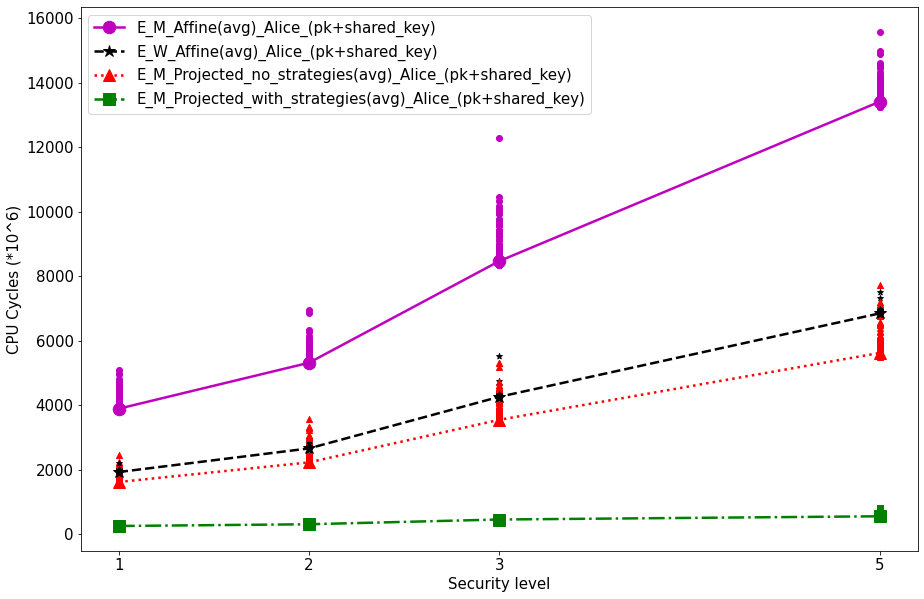

In [41]:
graph_line = 'Alice_(pk+shared_key)'
y_axis_label = 'CPU Cycles (*10^6)'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [34]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],int(locals()[figures[0]+'_'+graph_line][0]),int(locals()[figures[0]+'_'+graph_line][1]),int(locals()[figures[0]+'_'+graph_line][2]),int(locals()[figures[0]+'_'+graph_line][3]),figures[1],int(locals()[figures[1]+'_'+graph_line][0]),int(locals()[figures[1]+'_'+graph_line][1]),int(locals()[figures[1]+'_'+graph_line][2]),int(locals()[figures[1]+'_'+graph_line][3]),figures[2],int(locals()[figures[2]+'_'+graph_line][0]),int(locals()[figures[2]+'_'+graph_line][1]),int(locals()[figures[2]+'_'+graph_line][2]),int(locals()[figures[2]+'_'+graph_line][3]),figures[3],int(locals()[figures[3]+'_'+graph_line][0]),(locals()[figures[3]+'_'+graph_line][1]),int(locals()[figures[3]+'_'+graph_line][2]),int(locals()[figures[3]+'_'+graph_line][3])))

## Million CPU Cycles (*10^6) needed to generate Alice_(pk+shared_key) over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>3889</td><td style='text-align:center'>5314</td><td style='text-align:center'>8465</td><td style='text-align:center'>13410</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>1925</td><td style='text-align:center'>2658</td><td style='text-align:center'>4257</td><td style='text-align:center'>6845</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>1617</td><td style='text-align:center'>2225</td><td style='text-align:center'>3545</td><td style='text-align:center'>5618</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>252</td><td style='text-align:center'>306</td><td style='text-align:center'>453</td><td style='text-align:center'>553</td></tr></table>

# Bob's pk

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


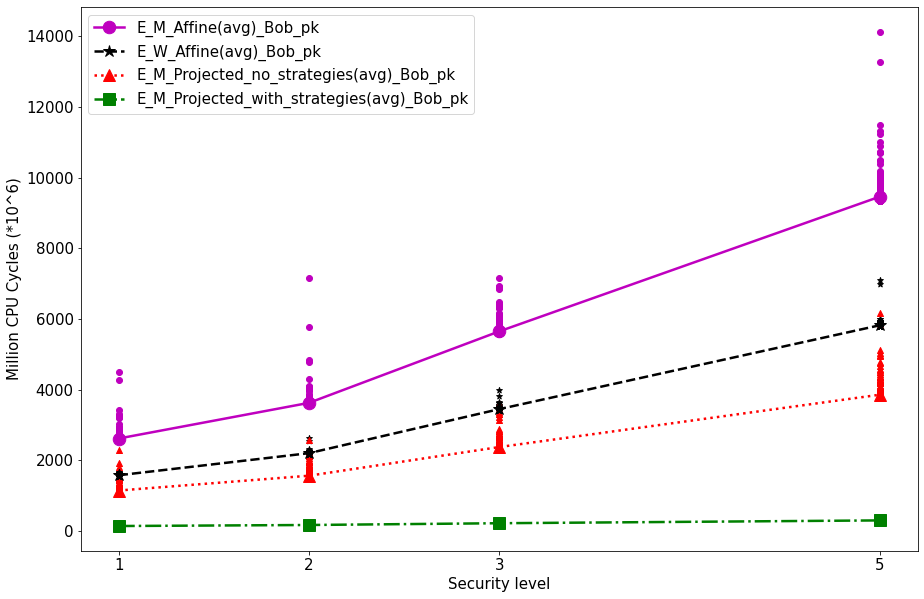

In [35]:
graph_line = 'Bob_pk'
y_axis_label = 'Million CPU Cycles (*10^6)'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [36]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],int(locals()[figures[0]+'_'+graph_line][0]),int(locals()[figures[0]+'_'+graph_line][1]),int(locals()[figures[0]+'_'+graph_line][2]),int(locals()[figures[0]+'_'+graph_line][3]),figures[1],int(locals()[figures[1]+'_'+graph_line][0]),int(locals()[figures[1]+'_'+graph_line][1]),int(locals()[figures[1]+'_'+graph_line][2]),int(locals()[figures[1]+'_'+graph_line][3]),figures[2],int(locals()[figures[2]+'_'+graph_line][0]),int(locals()[figures[2]+'_'+graph_line][1]),int(locals()[figures[2]+'_'+graph_line][2]),int(locals()[figures[2]+'_'+graph_line][3]),figures[3],int(locals()[figures[3]+'_'+graph_line][0]),(locals()[figures[3]+'_'+graph_line][1]),int(locals()[figures[3]+'_'+graph_line][2]),int(locals()[figures[3]+'_'+graph_line][3])))

## Million CPU Cycles (*10^6) needed to generate Bob_pk over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>2621</td><td style='text-align:center'>3630</td><td style='text-align:center'>5653</td><td style='text-align:center'>9465</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>1581</td><td style='text-align:center'>2206</td><td style='text-align:center'>3452</td><td style='text-align:center'>5825</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>1149</td><td style='text-align:center'>1568</td><td style='text-align:center'>2379</td><td style='text-align:center'>3860</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>144</td><td style='text-align:center'>173</td><td style='text-align:center'>223</td><td style='text-align:center'>303</td></tr></table>

# Bob's shared key

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


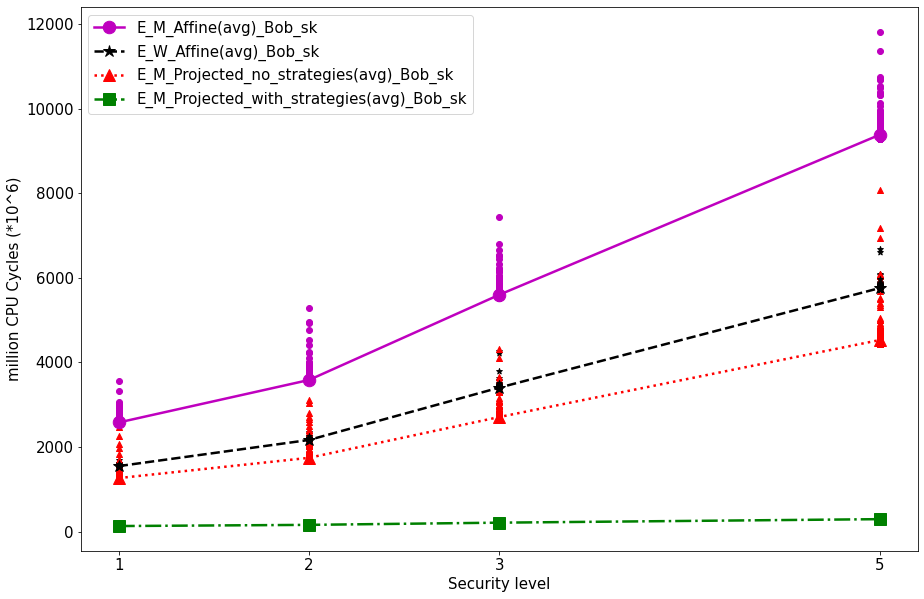

In [37]:
graph_line = 'Bob_sk'
y_axis_label = 'million CPU Cycles (*10^6)'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [38]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],int(locals()[figures[0]+'_'+graph_line][0]),int(locals()[figures[0]+'_'+graph_line][1]),int(locals()[figures[0]+'_'+graph_line][2]),int(locals()[figures[0]+'_'+graph_line][3]),figures[1],int(locals()[figures[1]+'_'+graph_line][0]),int(locals()[figures[1]+'_'+graph_line][1]),int(locals()[figures[1]+'_'+graph_line][2]),int(locals()[figures[1]+'_'+graph_line][3]),figures[2],int(locals()[figures[2]+'_'+graph_line][0]),int(locals()[figures[2]+'_'+graph_line][1]),int(locals()[figures[2]+'_'+graph_line][2]),int(locals()[figures[2]+'_'+graph_line][3]),figures[3],int(locals()[figures[3]+'_'+graph_line][0]),(locals()[figures[3]+'_'+graph_line][1]),int(locals()[figures[3]+'_'+graph_line][2]),int(locals()[figures[3]+'_'+graph_line][3])))

## million CPU Cycles (*10^6) needed to generate Bob_sk over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>2580</td><td style='text-align:center'>3584</td><td style='text-align:center'>5598</td><td style='text-align:center'>9381</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>1548</td><td style='text-align:center'>2166</td><td style='text-align:center'>3403</td><td style='text-align:center'>5757</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>1265</td><td style='text-align:center'>1744</td><td style='text-align:center'>2708</td><td style='text-align:center'>4528</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>131</td><td style='text-align:center'>159</td><td style='text-align:center'>211</td><td style='text-align:center'>294</td></tr></table>

# Bob's PK+ shared key

/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


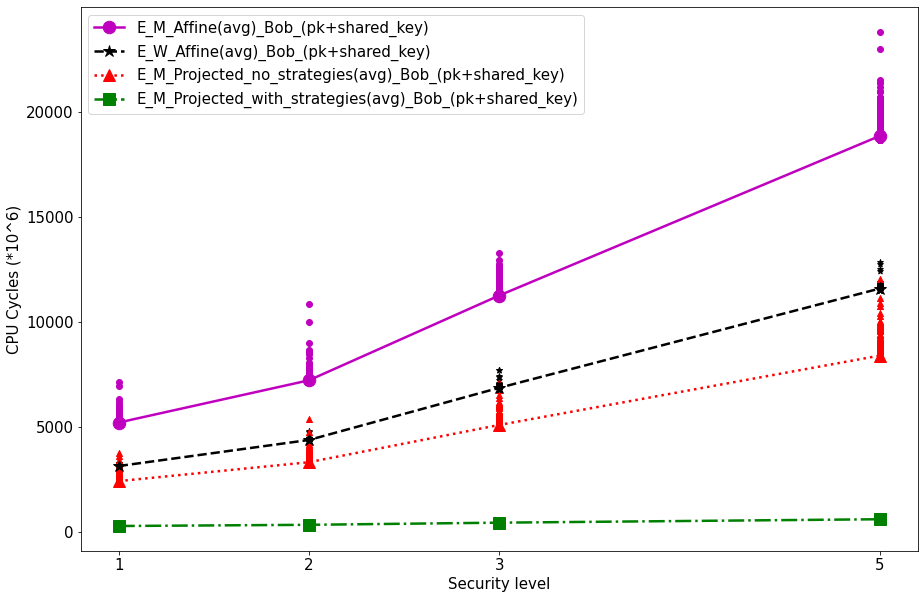

In [42]:
graph_line = 'Bob_(pk+shared_key)'
y_axis_label = 'CPU Cycles (*10^6)'
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
df=pd.DataFrame({'x_values': [1,2,3,5], figures[0]+'_'+graph_line: locals()[figures[0]+'_'+graph_line], figures[1]+'_'+graph_line: locals()[figures[1]+'_'+graph_line], figures[2]+'_'+graph_line: locals()[figures[2]+'_'+graph_line],figures[3]+'_'+graph_line: locals()[figures[3]+'_'+graph_line]})
#draw_function(df,y_axis_label)
factor = 2.5
plt.plot( 'x_values', figures[0]+'_'+graph_line, data=df, marker='o', markerfacecolor='m', markersize=factor*5, color='m', linewidth=factor, linestyle ='-')
plt.plot( 'x_values', figures[1]+'_'+graph_line, data=df, marker='*', markerfacecolor='k', markersize=factor*5, color='k', linewidth=factor, linestyle = '--')
plt.plot( 'x_values', figures[2]+'_'+graph_line, data=df, marker='^', markerfacecolor='r', markersize=factor*5, color='r', linewidth=factor,linestyle =':')
plt.plot( 'x_values', figures[3]+'_'+graph_line, data=df, marker='s', markerfacecolor='g', markersize=factor*5, color='g', linewidth=factor, linestyle ='-.')
        #plt.plot( 'x_values', figures[4]+'_'+graph_line, data=df, marker='x', markerfacecolor='b', markersize=factor*4, color='b', linewidth=factor)
    
plt.xticks([1,2,3,5])
ax = plt.subplot()
for index in range (0,iteration,1):
    ax.scatter([1,2,3,5],locals()[figures[0]+'_'+graph_line+'_'+'multiple'][index].tolist(),color='m',marker='o')
    ax.scatter([1,2,3,5],locals()[figures[1]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='*', color='k')
    ax.scatter([1,2,3,5],locals()[figures[2]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='^', color='r')
    ax.scatter([1,2,3,5],locals()[figures[3]+'_'+graph_line+'_'+'multiple'][index].tolist(),marker='s', color='g')
fontsize = factor*6
ax.set_xlabel('Security level',fontsize=fontsize)
ax.set_ylabel(y_axis_label,fontsize=fontsize)
ax.set_xticklabels([1,2,3,5], fontsize=fontsize)
        #ax.set_title('Generation time for Alice\'s PK over different levels of security using different implementations',fontsize = fontsize)
plt.yticks(fontsize=fontsize)
        # show legend. 
plt.legend(fontsize=fontsize)
        #plt.annotate (Alice_time_pk0[0], (1,Alice_time_pk0[0]))
figure_size = plt.gcf().get_size_inches()
        # show graph
plt.gcf().set_size_inches(factor * figure_size)
        #return plt
plt.show()

In [40]:
from IPython.display import Markdown as md
md("## "+y_axis_label+" needed to generate {} over different levels of security using different implementations: \n \n <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr><tr><th style='text-align:center'>{}</th><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td><td style='text-align:center'>{}</td></tr></table>".format(graph_line,figures[0],int(locals()[figures[0]+'_'+graph_line][0]),int(locals()[figures[0]+'_'+graph_line][1]),int(locals()[figures[0]+'_'+graph_line][2]),int(locals()[figures[0]+'_'+graph_line][3]),figures[1],int(locals()[figures[1]+'_'+graph_line][0]),int(locals()[figures[1]+'_'+graph_line][1]),int(locals()[figures[1]+'_'+graph_line][2]),int(locals()[figures[1]+'_'+graph_line][3]),figures[2],int(locals()[figures[2]+'_'+graph_line][0]),int(locals()[figures[2]+'_'+graph_line][1]),int(locals()[figures[2]+'_'+graph_line][2]),int(locals()[figures[2]+'_'+graph_line][3]),figures[3],int(locals()[figures[3]+'_'+graph_line][0]),(locals()[figures[3]+'_'+graph_line][1]),int(locals()[figures[3]+'_'+graph_line][2]),int(locals()[figures[3]+'_'+graph_line][3])))

## Million CPU Cycles (*10^6) needed to generate Bob_(pk+shared_key) over different levels of security using different implementations: 
 
 <table style='width:100%; border: 1px solid black'><tr><th style='text-align:center'></th><th style='text-align:center'> p434-level 1</th><th style='text-align:center'>p503-level 2</th><th style='text-align:center'>p610-level 3</th><th style='text-align:center'>p710-level 5</th></tr><tr><th style='text-align:center'>E_M_Affine(avg)</th><td style='text-align:center'>5202</td><td style='text-align:center'>7214</td><td style='text-align:center'>11251</td><td style='text-align:center'>18847</td></tr><tr><th style='text-align:center'>E_W_Affine(avg)</th><td style='text-align:center'>3130</td><td style='text-align:center'>4372</td><td style='text-align:center'>6855</td><td style='text-align:center'>11582</td></tr><tr><th style='text-align:center'>E_M_Projected_no_strategies(avg)</th><td style='text-align:center'>2413</td><td style='text-align:center'>3313</td><td style='text-align:center'>5087</td><td style='text-align:center'>8389</td></tr><tr><th style='text-align:center'>E_M_Projected_with_strategies(avg)</th><td style='text-align:center'>275</td><td style='text-align:center'>332</td><td style='text-align:center'>434</td><td style='text-align:center'>597</td></tr></table>